灰度图转换为二值图像（0, 255 两种取值）：不可取

手动更改图像的像素值分布

In [ ]:
"""
依次遍历图像每个像素点
    1. 如果像素值 < 150，该点的像素值 -= 100
    2. 否则：+= 50，如果超过 255，设置为255
"""
import cv2


# 读取图像
image = cv2.imread("img/src.jpg")
# image = cv2.imread("src.jpg")
# image = cv2.imread("test.jpg")
# image = cv2.imread("test1.png")

# 获取图像的高度和宽度
height, width, _ = image.shape

# 遍历图像的像素点
for y in range(height):
    for x in range(width):
        # 获取像素点的值（B, G, R）
        pixel = image[y, x]
        # 在这里对像素点进行处理
        # ...
        average = sum(pixel) // len(pixel)  # 计算平均值

        if average < 160:
            # 抑制小的 (黑色 -> 0) 降低文字线框亮度
            pixel = [max(int(value - 100) , 0) for value in pixel]
        else:
            # 放大大的 (白色 -> 255) 增大亮度
            pixel = [min(int(value + 30), 255) for value in pixel]

        # 将修改后的值赋给图像对应的像素位置
        image[y, x] = pixel

# 显示黑白图像
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cv2.imwrite("tmp.jpg", image)

统计像素值的分布情况

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_pixel_distribution(image_path):
    # 读取灰度图像
    image = cv2.imread(image_path, 0)

    # 统计像素值的分布
    pixel_values = image.flatten()

    # 绘制直方图
    plt.figure()
    plt.hist(pixel_values, bins=256, range=[0, 256])
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Count')
    plt.show()

    # 计算均值和方差
    mean_value = np.mean(pixel_values)
    variance = np.var(pixel_values)
    
    print("Mean Value:", mean_value)
    print("Variance:", variance)

# 示例用法
image_path = ""
analyze_pixel_distribution(image_path)


以像素点为index绘制灰度图的像素值分布情况

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_distribution(image_path):
    # 读取灰度图像
    image = cv2.imread(image_path, 0)
    
    # 获取图像的高度和宽度
    height, width = image.shape
    
    # 将图像的像素值展平
    pixel_values = image.flatten()
    
    # 绘制像素值分布
    plt.figure()
    plt.plot(range(len(pixel_values)), pixel_values)
    plt.title('Pixel Value Distribution by Pixel Index')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel Value')
    plt.show()

# 示例用法
plot_pixel_distribution(image_path)


对灰度图重新进行绘制，规则如下：
遍历整张灰度图，如果该点的像素值>170，将该点的像素值设置为255，否则将其像素值设置为0

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_modified_gray_image(image_path):
    # 读取灰度图像
    image = cv2.imread(image_path, 0)
    
    # 获取图像的高度和宽度
    height, width = image.shape
    
    # 创建空白图像用于绘制修改后的灰度图
    modified_image = np.zeros((height, width), dtype=np.uint8)
    
    # 遍历灰度图像，根据像素值进行修改
    for y in range(height):
        for x in range(width):
            if image[y, x] > 170:
                modified_image[y, x] = 100
    
    # 显示原始灰度图像和修改后的灰度图像
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Gray Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(modified_image, cmap='gray')
    plt.title('Modified Gray Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 示例用法
draw_modified_gray_image(image_path)


在原图上以像素值为颜色深度重新进行可视化

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_pixel_intensity(image_path):
    # 读取灰度图像
    image = cv2.imread(image_path, 0)
    
    # 使用imshow函数以像素值为颜色深度进行可视化
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.title('Pixel Intensity Visualization')
    plt.show()

# 示例用法
visualize_pixel_intensity(image_path)


x轴以像素值为index，横向扫描灰度图，将其在这一行的像素值进行统计求和，可视化展示

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_horizontal_pixel_sum(image_path):
    # 读取灰度图像
    image = cv2.imread(image_path, 0)
    
    # 获取图像的高度和宽度
    height, width = image.shape
    
    # 计算每行的像素值和
    pixel_sum = np.sum(image, axis=1)
    
    # 可视化每行的像素值和
    # plt.plot(pixel_sum, range(height))
    plt.plot(range(height), pixel_sum)
    plt.xlabel('Pixel Sum')
    plt.ylabel('Row Index')
    plt.title('Horizontal Pixel Sum Visualization')
    plt.show()

# 示例用法
visualize_horizontal_pixel_sum(image_path)


怎么让图片的线条更加明显：没什么用

In [ ]:
## 效果挺好；对比度增强（直方图均衡化）
import cv2

image_path="img/src.jpg"
image = cv2.imread(image_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
b, g, r = cv2.split(lab_image)
equalized = cv2.equalizeHist(b+r)

# 显示裁剪后的图像
# cv2.imshow('Image', equalized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite("tmp.jpg", equalized)

✅ 将图像进行分离，得到每个颜色通道的信息，重新对颜色通道进行组合

GPT: 每个颜色通道的性质，不谈基本的颜色，更加广泛的性质

In [ ]:
import cv2
import numpy as np

def average_blue_channel(image):
    # 分离B、G、R通道
    b_channel, g_channel, r_channel = cv2.split(image)

    # 计算B通道的平均值
    average_b = np.mean(b_channel)
    average_g = np.mean(g_channel)
    average_r = np.mean(r_channel)

    # 创建与原始图像大小相同的平均B通道图像
    average_b_channel = np.full_like(b_channel, average_b, dtype=np.uint8)
    average_g_channel = np.full_like(g_channel, average_g, dtype=np.uint8)
    average_r_channel = np.full_like(r_channel, average_r, dtype=np.uint8)

    # 合并平均B通道与原始G、R通道
    # averaged_image = cv2.merge([average_b_channel, g_channel, r_channel])
    # averaged_image = cv2.merge([average_b_channel, g_channel])
    averaged_image = average_b_channel + g_channel

    return averaged_image

# 读取图像
image = cv2.imread("img/src.jpg")

# 对B通道进行平均
averaged_image = average_blue_channel(image)

# 显示原始图像和平均B通道图像
# cv2.imshow("Original Image", image)
cv2.imshow("Averaged Blue Channel Image", averaged_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("tmp.jpg", averaged_image)


GPT: 
分别找到一张图片中距离四个角点最近点的第一个像素点的坐标，该像素点必须满足其灰度值<150;
按照行遍历的方式不可取，应该按照圆形遍历的方式，圆心为角点，这样才是距离最短.


根据四个角点的坐标对原图像进行裁剪，左上角点和右上角连线，左下角，右下角，左上角左下角，右上角右下角.

In [ ]:
import cv2
import numpy as np
import os


def find_nearest_point(image, center, threshold):
    rows, cols = image.shape
    min_distance = float("inf")
    nearest_point = None

    for r in range(min(rows, cols) // 2):
        for theta in np.arange(0, 2 * np.pi, 0.01):
            x = int(center[0] + r * np.cos(theta))
            y = int(center[1] + r * np.sin(theta))

            if x >= 0 and x < cols and y >= 0 and y < rows and image[y, x] < threshold:
                distance = np.linalg.norm(np.array([x, y]) - center)
                if distance < min_distance:
                    min_distance = distance
                    nearest_point = (x, y)

    return nearest_point


def crop_image(image, corners):
    # 定义目标图像的尺寸
    width = max(np.linalg.norm(corners[1] - corners[0]), np.linalg.norm(corners[3] - corners[2]))
    height = max(np.linalg.norm(corners[2] - corners[0]), np.linalg.norm(corners[3] - corners[1]))
    dst_corners = np.array([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]], dtype=np.float32)

    # 计算透视变换矩阵
    transform_matrix = cv2.getPerspectiveTransform(corners, dst_corners)

    # 进行透视变换
    warped_image = cv2.warpPerspective(image, transform_matrix, (int(width), int(height)))

    return warped_image


def run_find_nearest_point(image_path):
    # 读取图像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 四个角点的坐标
    top_left = (0, 0)
    top_right = (image.shape[1] - 1, 0)
    bottom_left = (0, image.shape[0] - 1)
    bottom_right = (image.shape[1] - 1, image.shape[0] - 1)

    # 设置阈值
    threshold = 150

    # 找到距离四个角点最近的第一个满足条件的像素点的坐标
    nearest_top_left = find_nearest_point(image, top_left, threshold)
    nearest_top_right = find_nearest_point(image, top_right, threshold)
    nearest_bottom_left = find_nearest_point(image, bottom_left, threshold)
    nearest_bottom_right = find_nearest_point(image, bottom_right, threshold)

    # 打印结果
    print("Nearest point to top left corner:", nearest_top_left)
    print("Nearest point to top right corner:", nearest_top_right)
    print("Nearest point to bottom left corner:", nearest_bottom_left)
    print("Nearest point to bottom right corner:", nearest_bottom_right)

    return nearest_top_left, nearest_top_right, nearest_bottom_left, nearest_bottom_right


def run_crop_image(image_path, top_left, top_right, bottom_left, bottom_right):
    # 读取图像
    image = cv2.imread(image_path)

    # 原图像的四个角点坐标
    original_corners = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

    # 对图像进行裁剪
    cropped_image = crop_image(image, original_corners)

    # 显示裁剪后的图像
    cv2.imshow("Cropped Image", cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.imwrite(f"img/cropped/{os.path.basename(image_path)}", cropped_image)


def main():
    image_path = "img/src.jpg"
    top_left, top_right, bottom_left, bottom_right = run_find_nearest_point(image_path)
    run_crop_image(image_path, top_left, top_right, bottom_left, bottom_right)


main()

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.6/doc/doc_en/inference_ppocr_en.md

In [ ]:
!curl -O https://paddleocr.bj.bcebos.com/PP-OCRv3/chinese/ch_PP-OCRv3_det_infer.tar

In [ ]:
!python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple
!python -m pip install "paddleocr>=2.0.1"

In [ ]:
!paddleocr --image_dir ./img/cropped/17.jpg --use_angle_cls true --use_gpu false

划分格子

In [ ]:
"""根据分布情况对图片进行线框划分"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0)

# 绘制直方图
plt.plot(column_sums)
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")
plt.show()

Python 读取图片，转换为灰度图，并分析图像每列像素值的和的直方图分布情况，横轴为每一列像素值对应的index，纵轴的值为每一个index对应的那列的像素值的和，opencv，图片的路径为："img/cropped/17.jpg"


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 获取图像的宽度
width = gray_image.shape[1]

# 定义区间大小
interval = 50

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 存储最大值和最小值点的索引
maxima_indices = []
minima_indices = []

# 初始化起点为0
start_index = 1

while start_index < width - 1:
    # 计算当前区间内的列索引范围
    end_index = min(start_index + interval, width)

    # 在当前区间内寻找最大值和最小值点的索引
    interval_column_sums = column_sums[start_index:end_index]
    max_index = np.argmax(interval_column_sums)
    maxima_indices.append(start_index + max_index)
    min_index = np.argmin(interval_column_sums)
    minima_indices.append(start_index + min_index)

    # 更新起点为横坐标更大的点
    start_index = min(maxima_indices[-1], minima_indices[-1])
    start_index += interval

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")

# 突出显示最大值点
plt.scatter(maxima_indices, column_sums[maxima_indices], color="red", label="Maxima")

# 突出显示最小值点
plt.scatter(minima_indices, column_sums[minima_indices], color="red", label="Minima")

# 在图像上显示坐标信息
for i in range(len(maxima_indices)):
    plt.annotate(
        f"({maxima_indices[i]}, {column_sums[maxima_indices[i]]})",
        (maxima_indices[i], column_sums[maxima_indices[i]]),
        color="red",
        xytext=(5, -15),
        textcoords="offset points",
    )

for i in range(len(minima_indices)):
    plt.annotate(
        f"({minima_indices[i]}, {column_sums[minima_indices[i]]})",
        (minima_indices[i], column_sums[minima_indices[i]]),
        color="red",
        xytext=(5, 10),
        textcoords="offset points",
    )

plt.legend()
plt.show()


> `from scipy.signal import find_peaks` 直接找到，可以自定义寻找的范围！±5

统计图中的极值点，极大值点和极小值点突出显示，并在图像上显示其坐标信息，图片的路径为："img/cropped/17.jpg"


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread('img/cropped/17.jpg')

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=5)
valleys, _ = find_peaks(-column_sums, distance=5)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel('Column Index')
plt.ylabel('Sum of Pixel Values')
plt.title('Histogram of Column Sums')

# 突出显示极大值点
for peak in peaks:
    plt.plot(peak, column_sums[peak], 'ro')
    plt.text(peak, column_sums[peak], f'({peak}, {column_sums[peak]})', color='red', fontsize=8)

# 突出显示极小值点
for valley in valleys:
    plt.plot(valley, column_sums[valley], 'bo')
    plt.text(valley, column_sums[valley], f'({valley}, {column_sums[valley]})', color='blue', fontsize=8)

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=20)
valleys, _ = find_peaks(-column_sums, distance=20)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")

# 突出显示极小值点
for valley in valleys[:-1]:
    plt.plot(valley, column_sums[valley], "ro")
    plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)

plt.show()

Tag1.0: 用极小值点的值和附近两边的点的值进行比较，选定 index[+/-4] 的值，如果差值 < 30000 就舍弃

找到满足这样条件的极小值点：
该极小值点的+10范围内有最大值，-10范围内也有最大值，最值的区间范围为40；
不显示极大值点，同时寻找的间隔设置为5，采用折线图显示

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread('img/cropped/17.jpg')

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0)

# Plot the dashed line for the mean value
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

# 寻找极大值和极小值点
peaks, _ = find_peaks(column_sums, distance=5)
valleys, _ = find_peaks(-column_sums, distance=5)

# 找到满足条件的极小值点
valid_valleys = []
for valley in valleys:
    if np.any(np.logical_and(valley + 5 > peaks, valley - 5 < peaks)):
        valid_valleys.append(valley)

# 绘制折线图
plt.plot(column_sums, color='blue')
plt.xlabel('Column Index')
plt.ylabel('Sum of Pixel Values')
plt.title('Histogram of Column Sums')

# 突出显示满足条件的极小值点
for valley in valid_valleys:
    plt.plot(valley, column_sums[valley], 'ro')
    plt.text(valley, column_sums[valley], f'({valley}, {column_sums[valley]})', color='red', fontsize=8)

plt.show()


先使用这个版本

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=20)
valleys, _ = find_peaks(-column_sums, distance=20)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")


# 突出显示极小值点，并进行比较
for valley in valleys[:-1]:
    # 比较左边点和右边点的差值
    left_diff = column_sums[max(valley - 4, 0)] - column_sums[valley]
    right_diff = column_sums[min(valley + 4, len(column_sums) - 1)] - column_sums[valley]
    # print(left_diff, right_diff)

    if left_diff < 0 or right_diff < 0:
        # 舍弃极小值点
        continue

    # 计算变化值的平均值
    variations = column_sums[valley - 3 : valley + 3]
    variations = sorted(variations)[1:-1]  # 去除最高和最低值
    average_variation = np.mean(variations)

    if average_variation > 200000:
        # print(average_variation)
        plt.axvline(valley, color="blue", linestyle="--")
        
        plt.plot(valley, column_sums[valley], "ro")
        plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)


plt.show()


找出行线：画出的垂直虚线就是对应的行线框，总共 12组，每一组有两根，直接看中间的线框就可以了。由于是进行裁剪规范化，认为起始位置和结束位置就为两根默认的线框

147691.3014623172
155313.0
153029.75
154928.0
154666.25
153262.25
155357.75
154686.0
153873.75
153713.0
154326.0
153791.25
152829.5
153714.0
154009.0
150964.25
152074.0
151321.5
151866.0
152282.0
149766.5
150721.0
152232.75
150840.75
153885.25


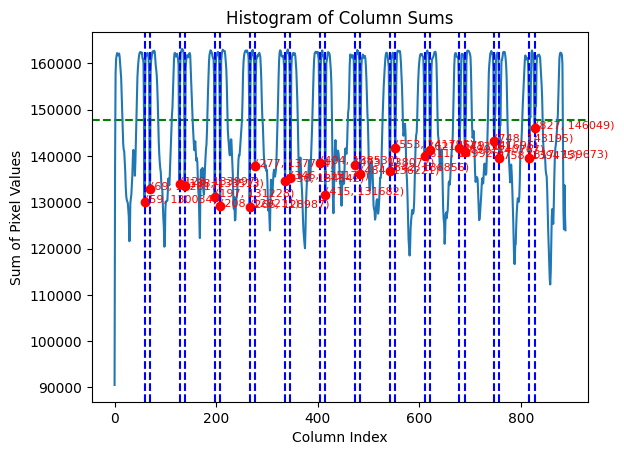

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=1).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=10)
valleys, _ = find_peaks(-column_sums, distance=10)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")


# 突出显示极小值点，并进行比较
for valley in valleys[:-1]:
    # 比较左边点和右边点的差值
    left_diff = column_sums[max(valley - 4, 0)] - column_sums[valley]
    right_diff = column_sums[min(valley + 4, len(column_sums) - 1)] - column_sums[valley]
    # print(left_diff, right_diff)

    if left_diff < 0 or right_diff < 0:
        # 舍弃极小值点
        continue

    # 计算变化值的平均值
    variations = column_sums[valley - 3 : valley + 3]
    variations = sorted(variations)[1:-1]  # 去除最高和最低值
    average_variation = np.mean(variations)

    if average_variation > 148000:
        print(average_variation)
        plt.axvline(valley, color="blue", linestyle="--")
        plt.plot(valley, column_sums[valley], "ro")
        plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)


plt.show()


整合以上代码，得到 横纵轴 的划分坐标；根据挑选出的极小值点的坐标在原图上画竖线。

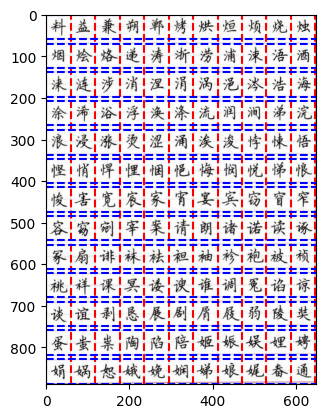

In [5]:
"""整合上面的代码"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


def getX(image_path):
    # 读取图像
    x = []
    image = cv2.imread(image_path)

    # 转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 计算每列像素值的和
    column_sums = np.sum(gray_image, axis=0).astype(np.int64)

    # 所有列的平均值，虚线显示
    mean_value = np.mean(column_sums)
    # print(mean_value)

    # 寻找极大值和极小值点，自定义寻找的范围：±5
    peaks, _ = find_peaks(column_sums, distance=20)
    valleys, _ = find_peaks(-column_sums, distance=20)

    # 突出显示极小值点，并进行比较
    for valley in valleys[:-1]:
        # # 比较左边点和右边点的差值
        left_diff = column_sums[max(valley - 4, 0)] - column_sums[valley]
        right_diff = column_sums[min(valley + 4, len(column_sums) - 1)] - column_sums[valley]
        # print(left_diff, right_diff)

        if left_diff < 0 or right_diff < 0:
            # 舍弃极小值点
            continue

        # 计算变化值的平均值
        variations = column_sums[valley - 3 : valley + 3]
        variations = sorted(variations)[1:-1]  # 去除最高和最低值
        average_variation = np.mean(variations)

        if average_variation > 200000:
            # print(average_variation)
            x.append(valley)

    return x


def getY(image_path):
    # 读取图像
    y = []
    image = cv2.imread(image_path)

    # 转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 计算每列像素值的和
    column_sums = np.sum(gray_image, axis=1).astype(np.int64)

    # 所有列的平均值，虚线显示
    mean_value = np.mean(column_sums)
    # print(mean_value)

    # 寻找极大值和极小值点，自定义寻找的范围：±5
    peaks, _ = find_peaks(column_sums, distance=10)
    valleys, _ = find_peaks(-column_sums, distance=10)

    # 突出显示极小值点，并进行比较
    for valley in valleys[:-1]:
        # 比较左边点和右边点的差值
        left_diff = column_sums[max(valley - 4, 0)] - column_sums[valley]
        right_diff = column_sums[min(valley + 4, len(column_sums) - 1)] - column_sums[valley]
        # print(left_diff, right_diff)

        if left_diff < 0 or right_diff < 0:
            # 舍弃极小值点
            continue

        # 计算变化值的平均值
        variations = column_sums[valley - 3 : valley + 3]
        variations = sorted(variations)[1:-1]  # 去除最高和最低值
        average_variation = np.mean(variations)

        if average_variation > 148000:
            # print(average_variation)
            y.append(valley)

    return y


def main():
    # Read the image
    image_path = "img/cropped/17.jpg"
    image = cv2.imread(image_path)

    x, y = getX(image_path), getY(image_path)

    # Add two extra x values for the left and right edges
    image_width = image.shape[1]
    x = [0] + x + [image_width - 1]

    # Add two extra y values for the top and bottom edges
    image_height = image.shape[0]
    y = [0] + y + [image_height - 1]

    # Convert image to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(image_rgb)

    # Draw vertical lines for x values (columns)
    for val in x:
        plt.axvline(x=val, color="red", linestyle="--")

    # Draw horizontal lines for y values (rows)
    for val in y:
        plt.axhline(y=val, color="blue", linestyle="--")

    # Show the image with grid
    plt.show()


main()

TODO: 
- [] 根据极小值点附近的 12/10 个差值，舍去最大最小，然后求平均，根据平均差值舍去不满足条件的值，得到满足条件的极小值，也就是我们想要的横纵分割线条

202619.70216049382


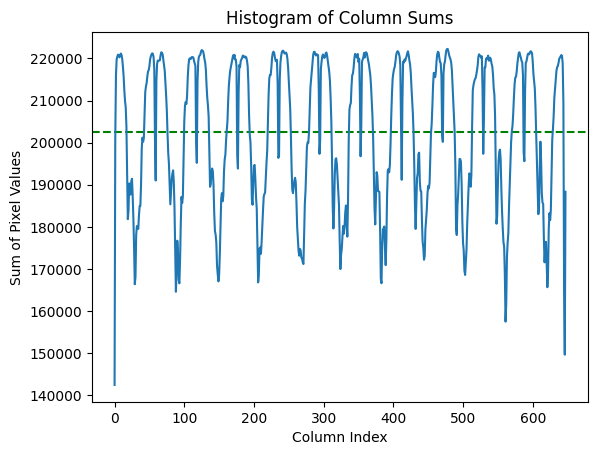

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=20)
valleys, _ = find_peaks(-column_sums, distance=20)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")


# 突出显示极小值点，并进行比较
for valley in valleys[:-1]:
    # 比较左边点和右边点的差值
    diff = []
    for i in range(1, 6):
        left_diff = column_sums[max(valley - i, 0)] - column_sums[valley]
        right_diff = column_sums[min(valley + i, len(column_sums) - 1)] - column_sums[valley]
        # print(left_diff, right_diff)

        if left_diff < 0 or right_diff < 0:
            # 从内层循环跳转到外层循环
            break_outer_loop = True
            # 舍弃极小值点
            break
        else:
            diff.extend([left_diff, right_diff])

    if "break_outer_loop" in locals() and break_outer_loop:
        # 跳出外层循环
        continue

    # 计算变化值的平均值
    # variations = column_sums[valley - 3 : valley + 3]
    variations = sorted(diff)[1:-1]  # 去除最高和最低值
    average_variation = np.mean(variations)

    if average_variation > 2000:
        # print(average_variation)
        plt.axvline(valley, color="blue", linestyle="--")

        plt.plot(valley, column_sums[valley], "ro")
        plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)


plt.show()

202619.70216049382


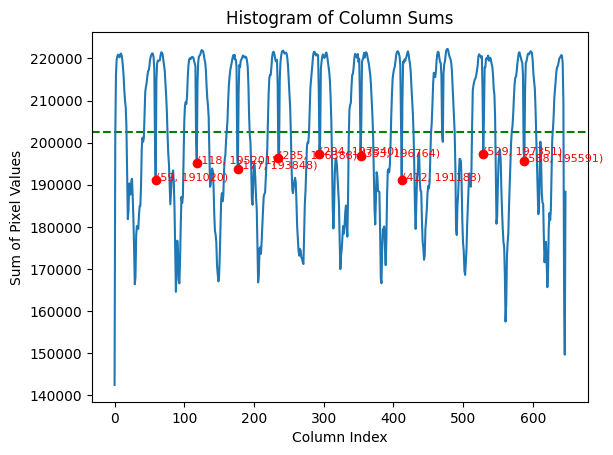

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/17.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=20)
valleys, _ = find_peaks(-column_sums, distance=20)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")


# 突出显示极小值点，并进行比较
for valley in valleys[:-1]:
    # 比较左边点和右边点的差值
    diff = []
    for i in range(1, 5):
        left_diff = column_sums[max(valley - i, 0)] - column_sums[valley]
        right_diff = column_sums[min(valley + i, len(column_sums) - 1)] - column_sums[valley]
        # print(left_diff, right_diff)

        if left_diff < 0 or right_diff < 0:
            # 从内层循环跳转到外层循环
            break_outer_loop = True
            # 舍弃极小值点
            break
        else:
            break_outer_loop = False
            diff.extend([left_diff, right_diff])

    # print("diff: ", diff)
    if "break_outer_loop" in locals() and break_outer_loop:
        # 跳出外层循环
        continue

    # 计算变化值的平均值
    # variations = column_sums[valley - 3 : valley + 3]
    variations = sorted(diff)[1:-1]  # 去除最高和最低值
    average_variation = np.mean(variations)
    # print("average_variation: ", average_variation)

    if average_variation > 20000:
        # print(average_variation)
        # plt.axvline(valley, color="blue", linestyle="--")

        plt.plot(valley, column_sums[valley], "ro")
        plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)


plt.show()

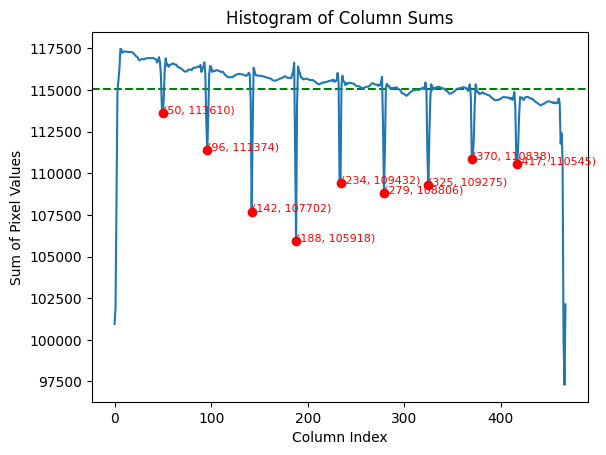

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取图像
image = cv2.imread("img/cropped/src.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 计算每列像素值的和
column_sums = np.sum(gray_image, axis=0).astype(np.int64)
# print(np.max(column_sums))

# 所有列的平均值，虚线显示
mean_value = np.mean(column_sums)
# print(mean_value)
plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

# 寻找极大值和极小值点，自定义寻找的范围：±5
peaks, _ = find_peaks(column_sums, distance=20)
valleys, _ = find_peaks(-column_sums, distance=20)

# 绘制折线图/直方图
plt.plot(column_sums)
# plt.bar(range(len(column_sums)), column_sums)  # 直方图
plt.xlabel("Column Index")
plt.ylabel("Sum of Pixel Values")
plt.title("Histogram of Column Sums")


valley_ = []
# 突出显示极小值点，并进行比较
for valley in valleys[:-1]:
    # 比较左边点和右边点的差值
    diff = []
    for i in range(1, 5):
        left_diff = column_sums[max(valley - i, 0)] - column_sums[valley]
        right_diff = column_sums[min(valley + i, len(column_sums) - 1)] - column_sums[valley]
        # print(left_diff, right_diff)

        if left_diff < 0 or right_diff < 0:
            # 从内层循环跳转到外层循环
            break_outer_loop = True
            # 舍弃极小值点
            break
        else:
            break_outer_loop = False
            diff.extend([left_diff, right_diff])

    # print("diff: ", diff)
    if "break_outer_loop" in locals() and break_outer_loop:
        # 跳出外层循环
        continue

    valley_.append(valley)

valley_ = valley_[1::2]

for valley in valley_:
    plt.plot(valley, column_sums[valley], "ro")
    plt.text(valley, column_sums[valley], f"({valley}, {column_sums[valley]})", color="red", fontsize=8)

plt.show()


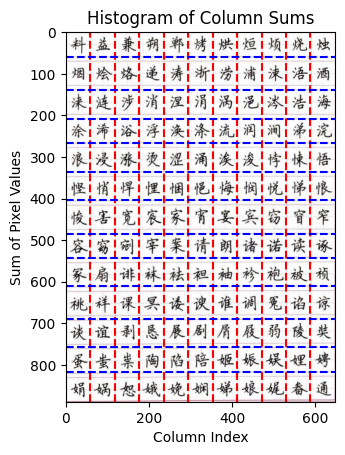

In [10]:
"""整合上面的代码"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


def getAxis(image_path, axis="x"):
    # 读取图像
    image = cv2.imread(image_path)

    # 转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 计算每列像素值的和
    column_sums = np.sum(gray_image, axis=0 if axis=="x" else 1).astype(np.int64)
    # print(np.max(column_sums))

    # 所有列的平均值，虚线显示
    mean_value = np.mean(column_sums)
    # print(mean_value)
    plt.axhline(mean_value, color="green", linestyle="--", label="Mean")

    # 寻找极大值和极小值点，自定义寻找的范围：±5
    peaks, _ = find_peaks(column_sums, distance=20)
    valleys, _ = find_peaks(-column_sums, distance=20)

    # 绘制折线图/直方图
    plt.plot(column_sums)
    # plt.bar(range(len(column_sums)), column_sums)  # 直方图
    plt.xlabel("Column Index")
    plt.ylabel("Sum of Pixel Values")
    plt.title("Histogram of Column Sums")

    valley_ = []
    # 突出显示极小值点，并进行比较
    for valley in valleys[:-1]:
        # 比较左边点和右边点的差值
        diff = []
        for i in range(1, 5):
            left_diff = column_sums[max(valley - i, 0)] - column_sums[valley]
            right_diff = column_sums[min(valley + i, len(column_sums) - 1)] - column_sums[valley]
            # print(left_diff, right_diff)

            if left_diff < 0 or right_diff < 0:
                # 从内层循环跳转到外层循环
                break_outer_loop = True
                # 舍弃极小值点
                break
            else:
                break_outer_loop = False
                diff.extend([left_diff, right_diff])

        # print("diff: ", diff)
        if "break_outer_loop" in locals() and break_outer_loop:
            # 跳出外层循环
            continue

        valley_.append(valley)

    return valley_[1::2]


def main():
    # Read the image
    image_path = "img/cropped/17.jpg"
    image = cv2.imread(image_path)

    x = getAxis(image_path, "x")
    y = getAxis(image_path, "y")

    # Convert image to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(image_rgb)

    # Draw vertical lines for x values (columns)
    for val in x:
        plt.axvline(x=val, color="red", linestyle="--")

    # Draw horizontal lines for y values (rows)
    for val in y:
        plt.axhline(y=val, color="blue", linestyle="--")

    # Show the image with grid
    plt.show()


main()